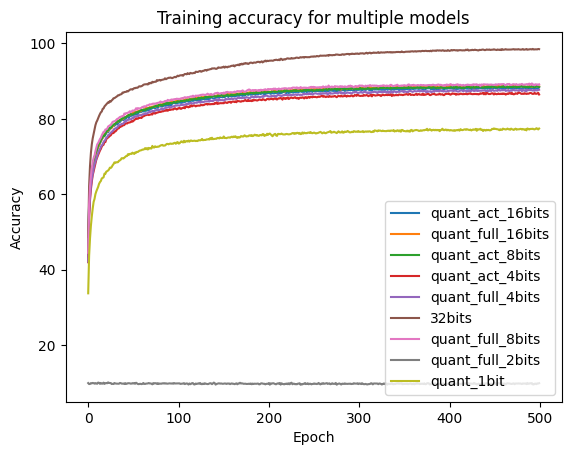

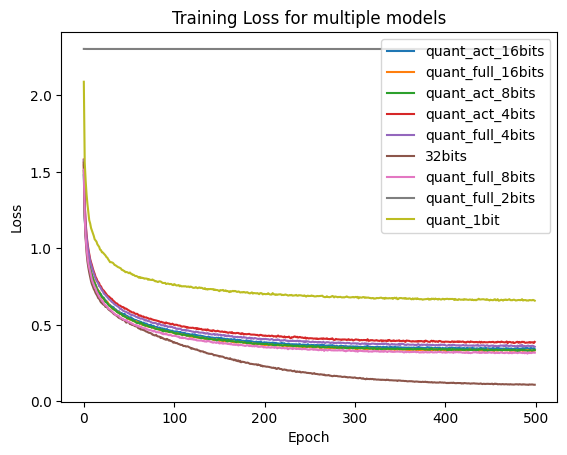

In [24]:
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt

dir_path = 'trained_models/'
progress_data = []
# Load the training history from a pkl file
for filename in os.listdir(dir_path):
    if filename.endswith('pkl'):
        with open(os.path.join(dir_path,filename), 'rb') as f:
            data = pickle.load(f)
            progress_data.append((filename,data))

# remove prefix and postfix:
prefix = 'trainedResnet_'
postfix = '.pkl'

#plot training accuracy
plt.figure()
for filename,data in progress_data:
    train_acc = [x * 100 for x in data['accuracy']]
    train_loss = data['loss']
    epochs = range(len(train_loss))
    label = filename[len(prefix):-len(postfix)]
    plt.plot(epochs, train_acc, label = label) 
plt.title('Training accuracy for multiple models')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#plot training Loss
plt.figure()
for filename,data in progress_data:
    train_acc = [x * 100 for x in data['accuracy']]
    train_loss = data['loss']
    epochs = range(len(train_loss))
    label = filename[len(prefix):-len(postfix)]
    plt.plot(epochs, train_loss, label = label)   
plt.title('Training Loss for multiple models')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

'ab'

In [43]:
my_list = [x * 100 for x in my_list]
print(my_list)

[100, 200, 300]


In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from keras_model_quant_1bit import quant_conv2D
custom_objects = {'quant_conv2D':  quant_conv2D}


model = load_model('trained_models/trainedResnet_quant_1bit.h5', custom_objects = custom_objects)
#model = load_model('trainedResnet_quant_1bit.h5', custom_objects=custom_objects)


2023-03-07 15:59:04.788756: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-07 15:59:05.493830: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-07 15:59:05.493883: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-07 15:59:07.671296: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 16)   448         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 16)  64          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 32, 32, 16)   0           ['batch_normalization[0][0]']

In [10]:
for layer in model.layers: 
    if layer.name
    #print(layer.weights)
    #print(layer.biases)
    # Get the weights and biases for the layer
    #weights, biases = layer.get_weights()
    
    # Add the weights and biases to the respective lists
    #weights_list.append(weights)
    #biases_list.append(biases)


input_1
[]
conv2d
[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 16) dtype=float32, numpy=
array([[[[ 0.1099914 , -0.09895784,  0.1994103 ,  0.5127881 ,
           0.3932212 ,  0.15546058, -0.3374578 , -0.03166134,
          -0.05898911, -0.4062676 ,  0.13836494, -0.31988287,
          -0.21253231,  0.24393545,  0.11428668,  0.16626757],
         [ 0.02288843,  0.34332678,  0.20204642, -0.3510069 ,
          -0.39386517,  0.22465038,  0.10007707,  0.09111808,
          -0.49956346,  0.2005602 , -0.16278413, -0.15265244,
           0.3230359 ,  0.09617002,  0.5050935 ,  0.14162174],
         [ 0.36611688, -0.19521372, -0.23953804,  0.02593601,
           0.4246023 ,  0.45976546, -0.33547482,  0.48719707,
          -0.23631577,  0.0296068 ,  0.12852462, -0.36624393,
          -0.11031447, -0.37242147,  0.0501642 ,  0.41630584]],

        [[-0.04751655, -0.40914506, -0.4508479 ,  0.07773896,
          -0.5502482 , -0.11853097, -0.24370621,  0.23278221,
          -0.41510883,  0.07507187,